In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import os
import glob
import cv2
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from skimage.io import imread, imsave
from skimage.transform import resize 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import * 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [4]:
train_dir='C:/Users/anupa/Downloads/Phase-1/Tongue/Train'
validation_dir='C:/Users/anupa/Downloads/Phase-1/Tongue/Val'
train_cancer=os.path.join(train_dir,'Cancer')
train_noncancer=os.path.join(train_dir,'Non Cancer')
val_cancer=os.path.join(validation_dir,'Cancer')
val_noncancer=os.path.join(validation_dir,'Non-Cancer')

In [5]:
train_c=os.listdir(train_cancer)
train_nc=os.listdir(train_noncancer)
val_c=os.listdir(val_cancer)
val_nc=os.listdir(val_noncancer)

print(len(train_c))
print(len(train_nc))
print(len(val_c))
print(len(val_nc))

95
185
31
63


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255.
)

In [7]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=10,
    class_mode='binary',
    target_size=(227,227)
) 

validation_generator =  test_datagen.flow_from_directory(
    validation_dir,
    batch_size=10,
    class_mode='binary',
    target_size=(227,227)
)

Found 280 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


In [14]:
def build_model():
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),
    strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    model.add(Dense(1366))
    model.add(Activation('relu'))

    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    model.add(Dense(400))
    model.add(Activation('relu'))
    
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.summary()

    optimizer = tf.keras.optimizers.RMSprop(0.0001)

    model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy'])

    model.summary()
    
    return model

In [18]:
model=build_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)      

In [21]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=6,
                              epochs=20,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=6,)

Epoch 1/20
6/6 [==============================] - 3s 263ms/step - loss: 0.5236 - accuracy: 0.7500 - val_loss: 0.6490 - val_accuracy: 0.6500
Epoch 2/20
6/6 [==============================] - 1s 210ms/step - loss: 0.4818 - accuracy: 0.8500 - val_loss: 0.6588 - val_accuracy: 0.6500
Epoch 3/20
6/6 [==============================] - 1s 198ms/step - loss: 0.2637 - accuracy: 0.9000 - val_loss: 0.6497 - val_accuracy: 0.6833
Epoch 4/20
6/6 [==============================] - 1s 203ms/step - loss: 0.3515 - accuracy: 0.8333 - val_loss: 0.6824 - val_accuracy: 0.6667
Epoch 5/20
6/6 [==============================] - 1s 204ms/step - loss: 0.3985 - accuracy: 0.8667 - val_loss: 0.8442 - val_accuracy: 0.6333
Epoch 6/20
6/6 [==============================] - 1s 201ms/step - loss: 0.6696 - accuracy: 0.7833 - val_loss: 0.7528 - val_accuracy: 0.6500
Epoch 7/20
6/6 [==============================] - 1s 208ms/step - loss: 0.3132 - accuracy: 0.9000 - val_loss: 0.7369 - val_accuracy: 0.6667
Epoch 8/20
6/6 [====

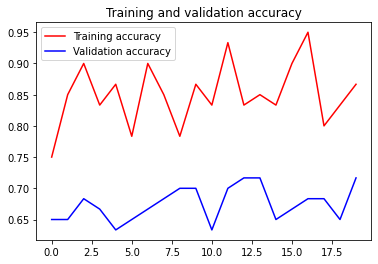

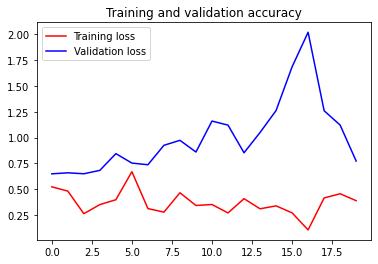

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend(loc=0)
plt.title('Training and validation accuracy')

plt.show()

## Adam

In [34]:
def build_model2():
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),
    strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    model.add(Dense(1366))
    model.add(Activation('relu'))

    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    model.add(Dense(400))
    model.add(Activation('relu'))
    
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.summary()

    optimizer = tf.keras.optimizers.Adam(0.0003)

    model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy'])

    model.summary()
    
    return model

In [35]:
model=build_model2()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 activation_36 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 activation_37 (Activation)  (None, 27, 27, 256)      

In [36]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=6,
                              epochs=20,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=6,)

Epoch 1/20
6/6 [==============================] - 2s 228ms/step - loss: 0.4848 - accuracy: 0.7667 - val_loss: 0.6503 - val_accuracy: 0.6667
Epoch 2/20
6/6 [==============================] - 1s 190ms/step - loss: 0.5625 - accuracy: 0.7167 - val_loss: 0.6668 - val_accuracy: 0.6333
Epoch 3/20
6/6 [==============================] - 1s 226ms/step - loss: 0.4421 - accuracy: 0.8167 - val_loss: 0.6231 - val_accuracy: 0.7000
Epoch 4/20
6/6 [==============================] - 1s 198ms/step - loss: 0.2967 - accuracy: 0.8667 - val_loss: 0.6881 - val_accuracy: 0.6667
Epoch 5/20
6/6 [==============================] - 1s 198ms/step - loss: 0.3804 - accuracy: 0.8500 - val_loss: 0.7927 - val_accuracy: 0.6833
Epoch 6/20
6/6 [==============================] - 1s 188ms/step - loss: 0.2718 - accuracy: 0.8833 - val_loss: 1.0884 - val_accuracy: 0.6000
Epoch 7/20
6/6 [==============================] - 1s 193ms/step - loss: 0.2435 - accuracy: 0.8833 - val_loss: 0.7705 - val_accuracy: 0.6333
Epoch 8/20
6/6 [====

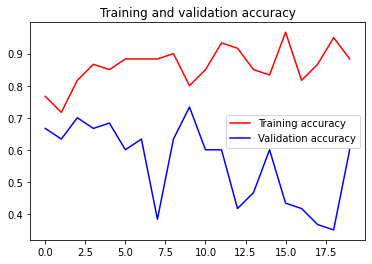

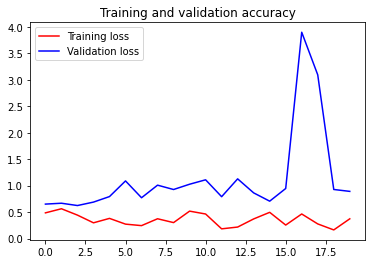

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend(loc=0)
plt.title('Training and validation accuracy')

plt.show()

# SGD

In [9]:
def build_model3():
    model = tf.keras.Sequential()
    model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),
    strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    model.add(Dense(1366))
    model.add(Activation('relu'))

    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    
    model.add(Dense(400))
    model.add(Activation('relu'))
    
    model.add(Dense(2))
    model.add(Activation('softmax'))
    model.summary()

    optimizer = tf.keras.optimizers.SGD(0.0001)

    model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy'])

    model.summary()
    
    return model

In [10]:
model=build_model3()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 27, 27, 256)       0

In [11]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=6,
                              epochs=20,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=6,)

Epoch 1/20
6/6 [==============================] - 11s 426ms/step - loss: 1.2421 - accuracy: 0.6167 - val_loss: 0.6836 - val_accuracy: 0.6667
Epoch 2/20
6/6 [==============================] - 1s 220ms/step - loss: 0.8559 - accuracy: 0.6167 - val_loss: 0.6738 - val_accuracy: 0.7000
Epoch 3/20
6/6 [==============================] - 1s 222ms/step - loss: 0.6328 - accuracy: 0.7333 - val_loss: 0.6615 - val_accuracy: 0.6833
Epoch 4/20
6/6 [==============================] - 1s 217ms/step - loss: 0.9749 - accuracy: 0.6167 - val_loss: 0.6612 - val_accuracy: 0.6333
Epoch 5/20
6/6 [==============================] - 1s 196ms/step - loss: 0.5021 - accuracy: 0.7667 - val_loss: 0.6495 - val_accuracy: 0.6500
Epoch 6/20
6/6 [==============================] - 1s 217ms/step - loss: 0.5485 - accuracy: 0.7667 - val_loss: 0.6125 - val_accuracy: 0.7167
Epoch 7/20
6/6 [==============================] - 1s 209ms/step - loss: 0.6131 - accuracy: 0.7333 - val_loss: 0.6354 - val_accuracy: 0.6667
Epoch 8/20
6/6 [===